# Training and Evaluation 2

## 1/11/2023

[print view](?print-pdf)

[notebook](training2.ipynb)


In [1]:
%%html
<script src="https://bits.csb.pitt.edu/preamble.js"></script>

# Recap

* Models: Classification vs. Regression
* Evaluation of model predictions
 * Regression: mean squared error, root mean squared error, absolute error, correlation
 * Classification: accuracy, F1 (precision+recall), **AUC**
* Evaluation of *models*
 * Cross-validation

## What is 'good'?
  * compare to previous work
  * compare to trivial baseline
  * compare to simple baseline

In [2]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
data = pd.read_csv('bcsmall.csv')
features = data.drop(['age','alive'],axis='columns')
genes = data.columns[2:]

You are developing a very cheap machine learning powered at-home test for a rare condition.  If the test reports a positive value (the user has the condition), a more expensive, but still non-invasive, test can be run to verify the diagnosis.  If the test  erroneously reports a negative result, the user will die a horrible and painful preventable death.  

In [3]:
%%html
<div id="evalq" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#evalq';
	jQuery(divid).asker({
	    id: divid,
	    question: "Which metric are you probably most concerned with?",
		answers: ["Recall","Precision","Accuracy","F1","Liability"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();

</script>

# Generalized F1

$$F_\beta = (1+\beta^2)\frac{\mathrm{precision}\cdot\mathrm{recall}}{(\beta^2\cdot\mathrm{precision})+\mathrm{recall}}$$

Bias towards recall:
$$F_2 = \frac{5\cdot\mathrm{precision}\cdot\mathrm{recall}}{(4\cdot\mathrm{precision})+\mathrm{recall}}$$
Bias towards precision:
$$F_{0.5} = \frac{1.25\cdot\mathrm{precision}\cdot\mathrm{recall}}{(.25\cdot\mathrm{precision})+\mathrm{recall}}$$

# Reminder: AUC of ROC

In [4]:
from sklearn.metrics import *
logistic_regression = LogisticRegression()
logistic_regression.fit(features,data.alive)
prob = logistic_regression.predict_proba(features)[:,1]
predicts =  logistic_regression.predict(features)

print("AUC of probabilities: %f"%roc_auc_score(data.alive,prob))
print("AUC of predictions: %f"%roc_auc_score(data.alive,predicts))

AUC of probabilities: 0.983674
AUC of predictions: 0.688235


## Why different?

In [5]:
import matplotlib.pyplot as plt

In [6]:
fpr,tpr,_ = roc_curve(data.alive,prob)
pfpr,ptpr,_ = roc_curve(data.alive,predicts)
plt.plot(fpr,tpr,label='predict_proba')
plt.plot(pfpr,ptpr,label='predict')
plt.gca().set_aspect('equal');plt.legend();plt.xlabel('FPR');plt.ylabel('TPR');

In [7]:
predicts

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [8]:
fpr,tpr,_ = roc_curve([1,1,0,0,0,1],[.5,1,.6,0,2,.8])
plt.plot(fpr,tpr)
plt.gca().set_aspect('equal')
plt.xlabel('FPR')
plt.ylabel('TPR');
fig = plt.gcf()

In [9]:
fig

In [10]:
%%html
<div id="aucstairs" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#aucstairs';
	jQuery(divid).asker({
	    id: divid,
	    question: "Which does the stair shape mean?",
		answers: ["The test set is small","Many identical predictions","Winning/losing streaks","All the above","Some of the above"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();

</script>

# Reminder: Cross Validation

In cross validation we train on a portion of the data and test on the remainder.

### K-Fold Cross Validation
 * split data into *k* **non-overlapping** parts, or folds
 * train *k* models, each using a different set of k-1 folds
 * evaluate on held out set
 
 If k == n, called leave-one-out cross validation.
 
 <img width="600" src="http://i.stack.imgur.com/1fXzJ.png">

In [11]:
%%html
<div id="booty" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#booty';
	jQuery(divid).asker({
	    id: divid,
	    question: "Which kind of cross validation constructs training sets by sampling with replacment?",
		answers: ["Clustered","Stratified","Oversampling","Bootstrapping","Out-of-bag"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();

</script>

# Vocab

* **Training Data**  Data used to fit a model.
* **Validation Data** Data used to evaluate a model and optimize model (hyper) parameters
* **(Independent) Test Data** Data used **once** to evaluate *final* model.  

<img src="https://miro.medium.com/max/700/1*Nv2NNALuokZEcV6hYEHdGA.png">

# Regularization

**Lasso** is a modified form of linear regression that includes an L1 regularization parameter $\alpha$
$$\sum(Xw - y)^2 + \alpha\sum|w|$$

**Ridge** regression includeds an L2 regularization parameter.
$$\sum(Xw - y)^2 + \alpha\sum|w|^2$$

**Elastic net includes both**
$$\sum(Xw - y)^2 + \alpha \rho \sum|w| + \alpha (1-\rho) \sum|w|^2$$

Lasso: $\rho = 1$

Ridge: $\rho = 0$ 

The higher the value of $\alpha$, the greater the penalty for having non-zero weights.  This has the effect of driving weights to zero and selecting fewer features for the model.


# Model Parameter Optimization

Most classifiers have parameters, like $\alpha$ in Lasso, that can be set to change the classification behavior.  These are **hyperparameters** - they are parameters that control the learning process, not parameters that are learned during training.

A key part of training a model is figuring out what hyperparameters to use.

This is typically done by a brute-force grid search (i.e., try a bunch of values and see which ones work)

In [12]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

# Loss (cost) functions

Note that for this notation $y \in \{0,1\}$

Recall:
$$\hat{p}(X_i) = \frac{1}{1 + e^{(-X_i w - w_0)}}$$

L2 regularized logistic regression:
$$\min_{w} \frac{1}{2}w^T w + 
 C \sum_{i=1}^n \left(-y_i \log(\hat{p}(X_i)) - (1 - y_i) \log(1 - \hat{p}(X_i))\right) $$

L1 regularized logistic regression:
$$\min_{w} \|w\|_1 + 
 C \sum_{i=1}^n \left(-y_i \log(\hat{p}(X_i)) - (1 - y_i) \log(1 - \hat{p}(X_i))\right) $$

# Model Parameter Optimization

* **Grid search**. Systematically explore hyper parameter space.  Highly parallel.
* **Random search**. Randomly explore hyper parameter space. Highly parallel.  In practice usually outperforms grid search.
* **Bayesian optimization**.  Intelligently explore hyper parameter space.  Less parallel.

<table>
    <tr><td>
<img width="200px"  src="https://daks2k3a4ib2z.cloudfront.net/59235ff882b78a59a72fa9bd/593477f0c5b12e2f0b26ec3a_tumblr_inline_o7181iRIMT1toi3ym_540.gif"></td>
 <td><img width="200px"  src="https://daks2k3a4ib2z.cloudfront.net/59235ff882b78a59a72fa9bd/593477f37fa7db0d44d42510_tumblr_inline_o7181jRDUR1toi3ym_540.gif"></td>
 <td><img width="200px" src="https://daks2k3a4ib2z.cloudfront.net/59235ff882b78a59a72fa9bd/593477fa4beb0a0d64a26806_tumblr_inline_o7181mi1eT1toi3ym_540.gif"></td>
    </tr>
    </table>

http://blog.sigopt.com/post/144221180573/evaluating-hyperparameter-optimization-strategies

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'C': [0.01,0.1,1.0,10,100], #regularization strength, smaller means stronger regularization
  'penalty': ['l1','l2'],
   'solver': ['liblinear']}
 ]
grid_search = GridSearchCV(logistic_regression_model, param_grid,scoring='roc_auc',return_train_score=True) 

In [14]:
grid_search.fit(features,data.alive)
results = pd.DataFrame(grid_search.cv_results_)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.025610      0.005470         0.012169        0.000768    0.01   
1       0.021763      0.000103         0.011302        0.000385    0.01   
2       0.021397      0.000182         0.012072        0.000557     0.1   
3       0.022877      0.000778         0.013038        0.002132     0.1   
4       0.022410      0.000151         0.012311        0.000899     1.0   
5       0.023331      0.000264         0.011583        0.000285     1.0   
6       0.025823      0.000899         0.011762        0.000065      10   
7       0.025896      0.000688         0.012265        0.000860      10   
8       0.028389      0.001174         0.011824        0.000429     100   
9       0.026403      0.000829         0.011637        0.000077     100   

  param_penalty param_solver  \
0            l1    liblinear   
1            l2    liblinear   
2            l1    liblinear   
3            l2    liblinear   
4            l1    liblinear   
5            l2    liblinear   
6            l1    liblinear   
7            l2    liblinear   
8            l1    liblinear   
9            l2    liblinear   

                                              params  split0_test_score  \
0  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...           0.500000   
1  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...           0.351644   
2  {'C': 0.1, 'penalty': 'l1', 'solver': 'libline...           0.492647   
3  {'C': 0.1, 'penalty': 'l2', 'solver': 'libline...           0.398789   
4  {'C': 1.0, 'penalty': 'l1', 'solver': 'libline...           0.591047   
5  {'C': 1.0, 'penalty': 'l2', 'solver': 'libline...           0.442907   
6  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}           0.483997   
7  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}           0.439014   
8  {'C': 100, 'penalty': 'l1', 'solver': 'libline...           0.405709   
9  {'C': 100, 'penalty': 'l2', 'solver': 'libline...           0.421713   

   split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.500000  ...         0.500000        0.000000                9   
1           0.493945  ...         0.513780        0.115224                8   
2           0.500000  ...         0.498529        0.002941               10   
3           0.581315  ...         0.541990        0.090484                4   
4           0.571367  ...         0.517711        0.063177                7   
5           0.601211  ...         0.545904        0.061375                2   
6           0.575260  ...         0.545795        0.040221                3   
7           0.589100  ...         0.552900        0.067465                1   
8           0.578287  ...         0.522072        0.060031                6   
9           0.573097  ...         0.537611        0.063413                5   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.500000            0.500000            0.500000   
1            0.651313            0.622390            0.614852   
2            0.556989            0.500000            0.500000   
3            0.910718            0.920531            0.921207   
4            0.869659            0.886988            0.875190   
5            0.991913            0.990771            0.986488   
6            0.998519            0.997037            0.996920   
7            0.997866            0.996561            0.994709   
8            0.999932            0.999850            0.999864   
9            0.999878            0.999823            0.999783   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.500000            0.500000          0.500000         0.000000  
1            0.587096            0.633180          0.621766         0.021230  
2            0.500000            0.500000          0.511398         0.022795  
3            0.942614            0.924693          0.923953         0.010423  
4            0.90

In [19]:
results = results.apply(pd.to_numeric,errors='ignore')
results.pivot(index="param_C", columns="param_penalty", values="mean_test_score")

param_penalty        l1        l2
param_C                          
0.01           0.500000  0.513780
0.10           0.498529  0.541990
1.00           0.517711  0.545904
10.00          0.545795  0.552900
100.00         0.522072  0.537611

In [20]:
results.pivot(index="param_C", columns="param_penalty",values="mean_train_score")

param_penalty        l1        l2
param_C                          
0.01           0.500000  0.621766
0.10           0.511398  0.923953
1.00           0.887361  0.989420
10.00          0.997679  0.997081
100.00         0.999916  0.999807

# Interpretting a Model

One advantage of linear models is they are very easy to interpret.  Each weight coefficient tells you how important a feature is and which direction it pushes the classification.

In [21]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(C=10)
logistic_regression.fit(features,data.alive)
logistic_regression.intercept_

array([3.04327491])

In [22]:
sortedweights = sorted(zip(data.columns[2:],logistic_regression.coef_[0]),key=lambda nc: nc[1])

In [23]:
sortedweights[:10]

[('PIK3R1', -2.874088611326588),
 ('CSMD3', -2.8151218379587393),
 ('THSD7A', -2.766726935539717),
 ('CAD', -2.5929974178877524),
 ('PKD1L1', -2.5796542176332724),
 ('SDK2', -2.5767565204604916),
 ('NALCN', -2.453466426627667),
 ('PXDNL', -2.4230429934666056),
 ('FAT1', -2.39291299020168),
 ('ADAMTS12', -2.3833216686867518)]

In [24]:
sortedweights[-10:]

[('ZFHX4', 2.1626666779484407),
 ('RYR1', 2.198097348283536),
 ('TLR4', 2.241908338758221),
 ('GCC2', 2.27350644321561),
 ('MAP1A', 2.311359601052278),
 ('HSPG2', 2.4600935594282065),
 ('SF3B1', 2.4678744338251706),
 ('HS6ST1', 2.4949960821740724),
 ('TBC1D4', 2.501116817134397),
 ('OTOF', 2.575083185135333)]

# Feature Engineering vs. Feature Selection

 * Feature Engineering: how you represent your data (e.g. a molecule can be a binary fingerprint, a graph, a string, a bag of distances, a density grid, a wave function...)
 * Feature Selection:  Deciding which features to use in your model

# Feature Selection

Interestingly, even with regularization, *none* of the logistic regression weights were zero (probably need a larger regularization term and/or use of L1).

In [25]:
import numpy as np
np.count_nonzero(logistic_regression.coef_),logistic_regression.coef_.shape

(497, (1, 497))

In [26]:
plt.hist(logistic_regression.coef_[0],bins=20);

In [27]:
logistic_regression_l1 = LogisticRegression(C=10,penalty='l1',solver='liblinear')
logistic_regression_l1.fit(features,data.alive);

In [28]:
np.count_nonzero(logistic_regression_l1.coef_)

272

In [29]:
plt.hist(logistic_regression_l1.coef_[0],bins=20);

*L1 regularization tends to result in sparse solutions*

https://explained.ai/regularization/L1vsL2.html

<table>
<tr><td><img width="350px" src="https://explained.ai/regularization/images/L1contour.png"></td>
    <td><img width="350px" src="https://explained.ai/regularization/images/L2contour.png"></td>
    </tr>
    </table>


# Feature Selection


Fewer features -> simpler model -> less overfitting -> but also less expressive
* **Univariate feature selection** 
* **Model-guided feature selection** 
* **Recursive feature elimination**
* **Iterative greedy feature selection**
* **Non-greedy algorithms**  

# Univariate Feature Selection

 Remove features based on statistical test of single feature. 
 
 `VarianceThreshold` will transform features by selecting only those with variance greater than specified threshold.  Can extract the mask (`get_support`) used to select features and can apply transformation to other identically shaped feature sets.

In [30]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=.1)
sel_features = sel.fit_transform(features)
genes[sel.get_support()]

Index(['GATA3', 'PIK3CA', 'TP53', 'TTN'], dtype='object')

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(logistic_regression,sel_features,data.alive,scoring='roc_auc',cv=5)

array([0.5841263 , 0.59731834, 0.40239651, 0.48366013, 0.57777778])

In [32]:
%%html
<div id="varthresh" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#varthresh';
	jQuery(divid).asker({
	    id: divid,
	    question: "If all the examples have the same value for a feature, will that feature be selected with this method?",
		answers: ["Yes","No"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();

</script>

# Univariate Feature Selection

Can also look at the relationship between individual features and the label. 

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

sel = SelectKBest(chi2,k=10) # chi-squared statistic
sel_features = sel.fit_transform(features,data.alive)
genes[sel.get_support()]

Index(['ANK3', 'ATRX', 'ERBB3', 'GOLGA6L2', 'ITPR2', 'MLL3', 'NRXN2', 'PIK3R1',
       'RYR1', 'THSD7A'],
      dtype='object')

In [34]:
sel = SelectKBest(f_classif,k=10) # ANOVA F-value between label/feature (linear dependence)
sel_features = sel.fit_transform(features,data.alive)
genes[sel.get_support()]

Index(['ANK3', 'ATRX', 'ERBB3', 'GOLGA6L2', 'ITPR2', 'MLL3', 'NRXN2', 'PIK3R1',
       'RYR1', 'TTN'],
      dtype='object')

In [35]:
sel = SelectKBest(mutual_info_classif,k=10) # mutual information, slower but nonlinear
sel_features = sel.fit_transform(features,data.alive)
genes[sel.get_support()]

Index(['C2orf16', 'CNTNAP2', 'DLC1', 'FLG', 'IGSF10', 'KIAA1731', 'PAPPA2',
       'PCDH11X', 'RYR3', 'YLPM1'],
      dtype='object')

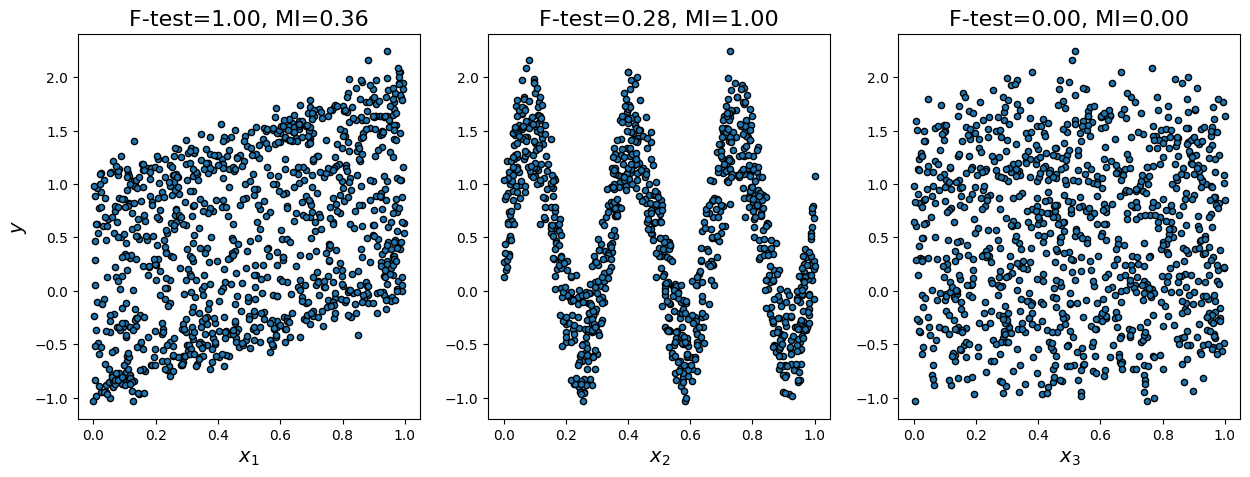

In [36]:
#https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]),
              fontsize=16)
fig = plt.gcf()

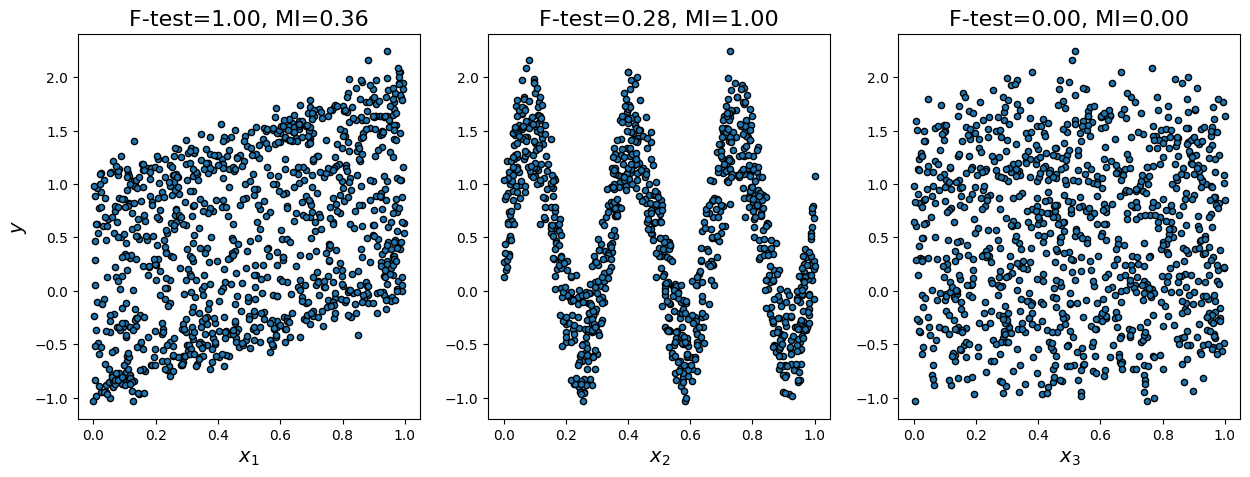

In [37]:
fig

# Model Based Feature Selection

Some property of the model training indicates which features are more important.

`coef_` for linear models

`feature_importances_` for others (not always available)

In [38]:
sorted(zip(genes,logistic_regression_l1.coef_[0]),key=lambda nc: -np.abs(nc[1]))[:20]

[('OTOF', 8.318000563181005),
 ('ADCY9', 6.36368946958728),
 ('HS6ST1', 5.8318291742792505),
 ('GCC2', 5.798156250030379),
 ('CAD', -5.7002216285858465),
 ('SF3B1', 5.604853663620851),
 ('TBC1D4', 5.309165098095831),
 ('CSMD3', -5.280542228366966),
 ('HSPG2', 4.957334645884697),
 ('FAT1', -4.941456274037348),
 ('PKD1L1', -4.924339486562262),
 ('SDK2', -4.872714093454895),
 ('MAP1A', 4.78851517979263),
 ('NBPF10', 4.692770172295094),
 ('PIK3R1', -4.638650836664384),
 ('PXDNL', -4.578419215285695),
 ('PCDH15', -4.518511634621906),
 ('GCN1L1', 4.4968690777393245),
 ('TLR4', 4.474158062733228),
 ('FLNC', -4.455407833174135)]

# Recursive Feature Elimination

Train model.  Get importances (coefficients for liner model).  Remove least important.  Repeat.

**Why?**

In [39]:
from sklearn.feature_selection import RFECV
selector = RFECV(logistic_regression, step=1, cv=5,n_jobs=-1,scoring='roc_auc') # remove 1 feature (step) at each iteration
selector.fit(features,data.alive);

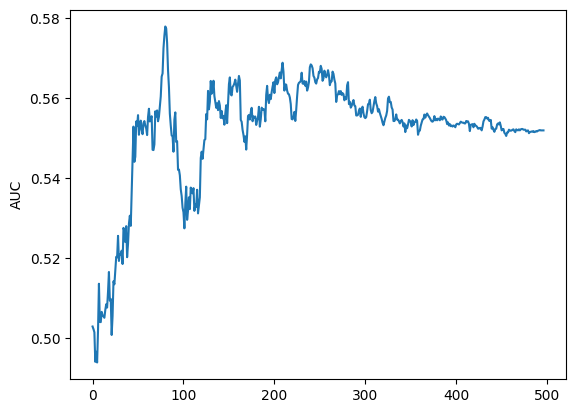

In [40]:
plt.plot(selector.cv_results_['mean_test_score']); plt.ylabel('AUC');

In [41]:
selector.n_features_

81

# Iterative greedy feature selection

 Try model with or without features, repeat.
  * <img src="figs/corcry.png" style="float:right; width:300px">  **Forward feature selection**: 
    * Start with no features
    * For every remaining feature
        * Train and evaluate model with current feature set plus one remaining feature
    * Add best performing feature to feature set
    * Repeat
  * **Backward feature selection**: Same as forward only in reverse (start with all features selected).

In [42]:
%%html
<div id="featuresel2" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#featuresel2';
	jQuery(divid).asker({
	    id: divid,
	    question: "Which is usually faster?",
		answers: ["Forward feature selection","Backward feature selection","They are about the same"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();

</script>

In [43]:
%%html
<div id="featuresel3" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#featuresel3';
	jQuery(divid).asker({
	    id: divid,
	    question: "Forward and backwards feature selection will select the same features if run to completion.",
		answers: ["True","False"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();

</script>

# Non-greedy algorithms

 * <img src="figs/dawg.png" style="float:right" width="450"> Randomly select features
 * genetic algorithm for selecting features
 * more intelligent search strategies (with backtracking)
 * ...

# Key Points

 * **Must cross-validate** or otherwise evaluate model on unseen data
  * your validation should accurately represent the intended use of the model
 * Need to parameterize model
  * feature representation (representation)
  * feature selection
  * regularization
  * model-specific settings
 * Once parameterized, **train on full dataset**
 * Ideally, retain **independent test set** that is not used for model optimization as final estimate of generalization error
 * Relationship of test set to training set should mimic expected relationship of new data to existing data.

# Some simple classifiers

# Naive Bayes

Make the simplistic assumption that all our features are independent and apply Bayes' theorem.

$$P(y \mid x_1,\dots,x_n) = \frac{P(y)P(x_1,\dots,x_n \mid y)}{P(x_1,\dots,x_n)}$$
If $x_i$ are independent
$$P(x_i \mid y, x_1,\dots,x_{i-1},x_{i+1}, \dots,x_n) = P(x_i \mid y)$$
and therefore (by the chain rule)
$$P(y \mid x_1,\dots,x_n) \propto P(y) \prod_i^n P(x_i \mid y)$$

$P(y)$ is the probability of seeing class $y$.  E.g., count the number of true examples and divide by the total number of training exampels to get $P(y=true)$.

# Naive Bayes

The various versions of naive Bayes primarily differ in how $P(x_i \mid y)$ is estimated and whether $x_i$ is Boolean or a count.

### Multinomial Naive Bayes

*Multinomial only cares about the **presence** of features and can handle feature counts.*

$$P(x_i \mid y ) = \frac{N_{yi} + \alpha}{N_y + n\alpha}$$
$N_{yi}$ is the number of times $x_i$ occurs in class $y$ in the training set. <br>
$N_y$ is the total number of all features in the class. $\sum_iN_{yi}$<br>
$\alpha$ is a smoothing parameter<br>
$n$ is the number of features




### Bernoulli Naive Bayes

Bernoulli requires **binary** features and considers both the presence and absence of features.

$$P(x_i \mid y ) = p_{yi}x_i+(1-p_{yi})(1-x_i)$$
where
$$p_{yi} = \frac{N_{yi}}{|y|}$$
We can include a smoothing parameter $\alpha$ here as well.

In [45]:
%%html
<div id="smoothing" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#smoothing';
	jQuery(divid).asker({
	    id: divid,
	    question: "Which value of alpha would cause problems if we encounter a feature not in the training set?",
		answers: ["0","0.5","1","2"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();

</script>

# Applying Naive Bayes

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

multinb = MultinomialNB()
Bnb = BernoulliNB()
multinb,Bnb

(MultinomialNB(), BernoulliNB())

### Multinomial w/smoothing (test-on-train)

In [47]:
from sklearn.metrics import roc_auc_score
multinb.fit(features,data.alive)
roc_auc_score(data.alive,multinb.predict(features))

0.7198366495785906

### Bernoulli w/smoothing (test-on-train)

In [45]:
Bnb.fit(features,data.alive)
roc_auc_score(data.alive,Bnb.predict(features))

0.6330263272221739

### Bernoulli no smoothing (test-on-train)

In [46]:
Bnb = BernoulliNB(alpha=0,force_alpha=True)
Bnb.fit(features,data.alive)
roc_auc_score(data.alive,Bnb.predict(features))

/Users/dkoes/Library/Python/3.9/lib/python/site-packages/sklearn/naive_bayes.py:1214: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/dkoes/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


0.5

# Implementing Naive Bayes


In [ ]:
#snippet from sklearn - Y has been binarized
n_effective_classes = Y.shape[1]
self.class_count_ = np.zeros(n_effective_classes, dtype=np.float64)
self.feature_count_ = np.zeros((n_effective_classes, n_features),
                               dtype=np.float64)
self._count(X, Y)
alpha = self._check_alpha()
self._update_feature_log_prob(alpha)
self._update_class_log_prior(class_prior=class_prior)

# Bernoulli

In [82]:
    def _count(self, X, Y):
        """Count and smooth feature occurrences."""
        if self.binarize is not None:
            X = binarize(X, threshold=self.binarize)
        self.feature_count_ += safe_sparse_dot(Y.T, X)
        self.class_count_ += Y.sum(axis=0)

    def _update_feature_log_prob(self, alpha):
        """Apply smoothing to raw counts and recompute log probabilities"""
        smoothed_fc = self.feature_count_ + alpha
        smoothed_cc = self.class_count_ + alpha * 2

        self.feature_log_prob_ = (np.log(smoothed_fc) -
                                  np.log(smoothed_cc.reshape(-1, 1)))

With `feature_log_prob_` calculated, prediction is straightforward:

In [83]:
def _joint_log_likelihood(self, X):
    #... checking ...
    return (safe_sparse_dot(X, self.feature_log_prob_.T) +
                self.class_log_prior_)

def predict(self, X):
    jll = self._joint_log_likelihood(X)
    return self.classes_[np.argmax(jll, axis=1)]    

def predict_log_proba(self, X):
    jll = self._joint_log_likelihood(X)
    # normalize by P(x) = P(f_1, ..., f_n)
    log_prob_x = logsumexp(jll, axis=1)
    return jll - np.atleast_2d(log_prob_x).T

How can we make Naive Bayes scale?

In [48]:
help(Bnb.partial_fit)

Help on method partial_fit in module sklearn.naive_bayes:

partial_fit(X, y, classes=None, sample_weight=None) method of sklearn.naive_bayes.BernoulliNB instance
    Incremental fit on a batch of samples.
    
    This method is expected to be called several times consecutively
    on different chunks of a dataset so as to implement out-of-core
    or online learning.
    
    This is especially useful when the whole dataset is too big to fit in
    memory at once.
    
    This method has some performance overhead hence it is better to call
    partial_fit on chunks of data that are as large as possible
    (as long as fitting in the memory budget) to hide the overhead.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training vectors, where `n_samples` is the number of samples and
        `n_features` is the number of features.
    
    y : array-like of shape (n_samples,)
        Target values.
    
    classes : array-l

# k-NN

$k$ nearest neighbors is a *non-generalizing* classifier.  

To make a prediction it finds the $k$ "nearest" examples in the training set and
 * takes the majority vote (classification) or
 * takes the average value (regression)
 * can weight votes/values by distance to give higher priority to closer data points
 
k-nn literally memorizes the training set.

Since we *want* a generalizing classifier and k-nn, by construction, is not, k-nn is often used as baseline for comparison.

Particularly for "big data", k-NN usually isn't a practical algorithm for prediction.  Why?

# k-NN Classification

<center><img src="https://scikit-learn.org/0.21/_images/sphx_glr_plot_classification_001.png"></center>

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

def showknn():
    n_neighbors = 15

    # import some data to play with
    iris = datasets.load_iris()

    # we only take the first two features. We could avoid this ugly
    # slicing by using a two-dim dataset
    X = iris.data[:, :2]
    y = iris.target

    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    weights = 'uniform'
    ks = [1,3,5,10,15,50,100,150]
    plt.figure(figsize=(len(ks)*4,12))
    for (i,n_neighbors) in enumerate(ks):
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X, y)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.subplot(2,len(ks)//2,i+1)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light,shading='nearest')

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                    edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("3-Class classification (k = %i, weights = '%s')"
                  % (n_neighbors, weights))

    plt.show()

In [49]:
showknn()

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(features,data.alive)
pred = knn.predict_proba(features)
fpr,tpr,_ = roc_curve(data.alive,pred[:,1])
fpr = np.insert(fpr,0,0);tpr = np.insert(tpr,0,0)
plt.plot(fpr,tpr,linewidth=3)
plt.gca().set_aspect('equal');plt.ylim(0,1);plt.xlabel('FPR');plt.ylabel('TPR');

Why does the ROC curve look like this?

# k-NN Regression

<center><img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_regression_001.png"></center>

# An Example

<center><img src="figs/faces.png" width="800"></center>

How would you scale k-NN?

## Next Week
 * Matrix factorization
 * Intro to computer systems